Stuart Rossiter, C00284845

# Licensing
K-Means Clustering on the January 2017 dataset of Lichess Games Copyright (C) 2025 Stuart Rossiter

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/.

# K-Means Clustering - Categorising Skill Level

Given a set of black and white elo, the need may arise to determine the skill level of the game. For example, we may want to determine whether it could be a Novice, Intermediate, Adept, Master, or Grandmaster level game. As always, first we must clean the data, and split it into training and testing data. There are over 10 million games in the acquired dataset. Of these games, a sample of ~300,000 games has been taken. In this case, only the white_elo, black_elo, and winner will be needed.

In [13]:
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

data = pandas.read_csv("Lichess_Games_Sample.csv")

black_elo = data["black_elo"].values
white_elo = data["white_elo"].values

train_black_elo, test_black_elo, train_white_elo, test_white_elo = train_test_split(black_elo, white_elo, train_size=0.7)

Now that our data has been prepared, we can start to work with it. Let's plot our data first.

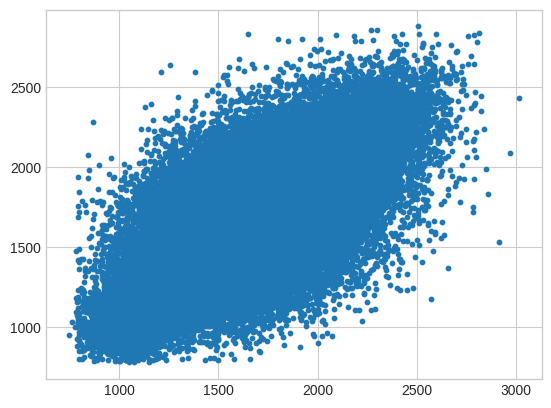

In [14]:
plt.scatter(train_black_elo, train_white_elo, s=10)

Our data has been plotted, so now it is time to split it up into clusters using k-means clustering.

Text(0, 0.5, 'White Rating')

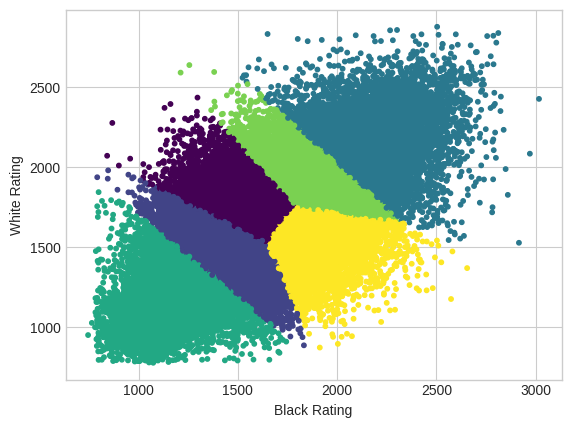

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=13)
data = np.column_stack((train_black_elo, train_white_elo))
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], s=10, c=y_kmeans, cmap="viridis")
plt.xlabel('Black Rating')
plt.ylabel('White Rating')

Here we can see 6 distinct clusters. The upper and lower elo brackets seem to form simple clusters, but the center clusters are very peculiar. If under the assumption of Novice -> Intermediate -> Adept -> Master -> Grandmaster, the center ones seem to form a square of Intermediate, Adept with white elo bias, Adept with black elo bias, and Master. The model seems to make simple classifications around the edges but the center has too many to make simple bands like the rest of them. Now, let's use our testing data with the model.

Text(0, 0.5, 'White Rating')

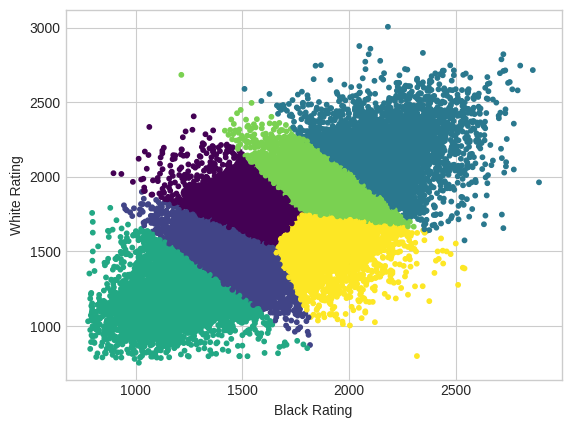

In [39]:
data = np.column_stack((test_black_elo, test_white_elo))
y_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], s=10, c=y_kmeans, cmap="viridis")
plt.xlabel('Black Rating')
plt.ylabel('White Rating')

It looks very similar to what we had before, which is good. Now let's check the silhouette score of the test data.

In [41]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, y_kmeans)
print("Silhouette Score: ", score)

Silhouette Score:  0.34242637885775734


Ranging from -1 to +1, the silhouette score tells us how effectively points were placed. A score of 1 suggests the point is well isolated from other clusters, and a score of -1 suggests the point is probably incorrectly assigned as it is closer to another cluster than it is to its own. The average score we found was 0.34. This suggests that most points are closer to the decision boundary of 2 clusters (score of 0), than they are to the cluster they were assigned. While not great, this is not a terrible outcome given what we see about how close the clusters are on the graph.

# Conclusion
K-Means clustering has its uses, and we managed to successfully classify rankings of chess games. Perhaps different cluster counts could have provided better (or worse) results, but the achieved outcome was satisfactory.